# Data Preparation

Notebook supporting the [**Do we know our data, as good as we know our tools** talk](https://devoxxuk19.confinabox.com/talk/VEM-8021/Do_we_know_our_data_as_good_as_we_know_our_tools%3F) at [Devoxx UK 2019](http://twitter.com/@DevoxxUK).

The contents of the notebook is inspired by many sources.


### High-level steps covered:

- Data Cleaning
  - Deal with errors 
  - Deal with duplicates
  - Deal with outliers
  - Deal with missing data
- Deal with too much data


## Resources

### Data cleaning
- [Data cleaning](https://elitedatascience.com/data-cleaning)
- [Spend Less Time Cleaning Data with Machine Learning](https://www.dataversity.net/spend-less-time-cleaning-data-with-machine-learning/#)
- [Helpful Python Code Snippets for Data Exploration in Pandas - lots of python snippets to select / clean / prepare](https://medium.com/@msalmon00/helpful-python-code-snippets-for-data-exploration-in-pandas-b7c5aed5ecb9)
- [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)
- [Journal of Statistical Software - TidyData](https://www.jstatsoft.org/article/view/v059i10/)

### Data preprocessing / Data Wrangling
- [Data Preprocessing vs. Data Wrangling in Machine Learning Projects](https://www.infoq.com/articles/ml-data-processing)
- [Improve Model Accuracy with Data Pre-Processing](https://machinelearningmastery.com/improve-model-accuracy-with-data-pre-processing/)
- **[Useful cheatsheets](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/README-details.md#cheatsheets)**


Please refer to the [Slides](http://bit.ly/do-we-know-our-data) for the step here after.

### Why?

Ask all the questions you should ask with regards to the domain and related domains or sub-domains.

It is a good idea to know the **why** part of the action, why are we doing what we are doing with the data, see the [five whys](https://en.wikipedia.org/wiki/5_Whys).

Some ideas (of course, please come up with your own as well):

- Garbage in, garbage out. If you work with dirty data, even the most
sophisticated models won’t be able to get satisfying results. Better
data beats fancier algorithms
- To create a healthier dataset (so that it has good enough accuracy
and correctness)
- So that we can create models that are closer to nature’s model

#### Load Your Data

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

sns.set()

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
names = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
data = pd.read_csv(url, names=names)

!rm  housing.names || true
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.names &> /dev/null
print("Names and descriptions of the fields of the Boston Housing dataset can be found at")
print("https://github.com/jbrownlee/Datasets/blob/master/housing.names")
print("")
!cat housing.names

rm: cannot remove 'housing.names': No such file or directory
Names and descriptions of the fields of the Boston Housing dataset can be found at
https://github.com/jbrownlee/Datasets/blob/master/housing.names

cat: housing.names: No such file or directory


### Add nulls to dataset (randomly to one or more columns)
_Not expected to be done with real world datasets, in this specific case it's a case of tainting the dataset to demonstrate how a duplicated dataset would look like._
_This is not a part of the DP process_

In [15]:
def generate_random_sample(source_list=range(0, 10), max_number_of_choices=5):
    return random.sample(set(source_list), random.randint(1, max_number_of_choices))

def create_rows_with_random_nulls(source_dataframe, num_of_rows=50, random_seed=42):
    random.seed(random_seed)
    
    random_rows = source_dataframe.sample(n=num_of_rows).copy()

    maximum_rows = random_rows.shape[0]
    maximum_columns = random_rows.shape[1]
    columns_to_fill = [random.choice(random_rows.columns) for dummy in generate_random_sample(source_list=range(0, maximum_columns), max_number_of_choices=maximum_columns)]

    for column in columns_to_fill:
        rows_to_fill = generate_random_sample(source_list=random_rows.index.values, max_number_of_choices=maximum_rows)
        for row in rows_to_fill:
            random_rows.loc[row, column] = np.nan

    target_dataframe = pd.concat([source_dataframe, random_rows])
    return target_dataframe
    
data = create_rows_with_random_nulls(data)

### Duplicate rows in clean dataset
_Not expected to be done with real world datasets, in this specific case it's a case of tainting the dataset to demonstrate how a duplicated dataset would look like._
_This is not a part of the DP process_

In [16]:
def duplicate_rows(source_dataframe, num_of_rows=50, random_seed=42):
    maximum_rows = source_dataframe.shape[0]
    random.seed(random_seed)
    
    random_indices = [random.randrange(0, maximum_rows) for a_random_value in range(num_of_rows)]
    random_rows = source_dataframe.iloc[random_indices].copy()

    target_dataframe = pd.concat([source_dataframe, random_rows])

    return target_dataframe

print("Before adding duplicates:", data.shape[0])
data = duplicate_rows(data)
print("After adding duplicates:", data.shape[0])

Before adding duplicates: 556
After adding duplicates: 606


### Data Cleaning

- deal with errors
- deal with duplicates
- deal with outliers
- deal with missing data

#### Deal with errors

Also known as structural errors.

|Type of problems |Technique to use|
|-----------------------------|---------------------------|
| mislabelled | relabel data automatically or manually |
|----------------------------------------------------------|-------------------------------------------------------------|
| dataset standardisation issue | uniformly replace them |
|----------------------------------------------------------|-------------------------------------------------------------|
| sync issues between sources of data | standardise the data |
|----------------------------------------------------------|-------------------------------------------------------------|

####  Deal with duplicates

Get stats on the number of non-unqiue or duplicate rows in a dataset and decide if you would like to delete them. In most case you would delete them.



Dataset rows count before dropping duplicates: 606
Duplicated rows count: 50
% of duplicated rows to total rows in the dataset: 8.25082508250825



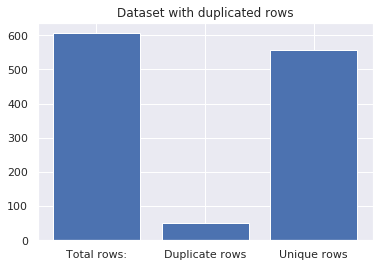

50 rows deleted
Dataset rows count after dropping duplicates: 556


In [17]:
total_rows_count = data.shape[0]
print("Dataset rows count before dropping duplicates:", total_rows_count)

duplicated_rows_count = data[data.duplicated()].shape[0]
print("Duplicated rows count:", duplicated_rows_count)
print("% of duplicated rows to total rows in the dataset:", duplicated_rows_count / total_rows_count * 100)
print()


labels = ("Total rows:", "Duplicate rows", "Unique rows")
values = (total_rows_count, duplicated_rows_count, total_rows_count - duplicated_rows_count)
plt.title("Dataset with duplicated rows")
plt.bar(labels, values)
plt.show()

# Delete duplicates
if duplicated_rows_count > 0:
    data = data.drop_duplicates()
    print(duplicated_rows_count, "rows deleted")

# Check the dataset after deletion
print("Dataset rows count after dropping duplicates:", data.shape[0])

#### Deal with outliers [DEMO - WALKTHRU]

![Normal distribution](https://www.mathsisfun.com/data/images/normal-distrubution-large.svg)

In [58]:
print("")
print(data.describe()["rm"])
rm_column = data["rm"]

num_of_outliers_rm_col = rm_column[(rm_column > (6.3 + 2 * 0.7))|(rm_column < (6.3 - 2 * 0.7))].count()
print("Number of outliers in the Room column (< mean - 2 std dev OR > mean + 2 std dev):", num_of_outliers_rm_col)


count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: rm, dtype: float64
Number of outliers in the Room column (< mean - 2 std dev OR > mean + 2 std dev): 31


Distribution with all values


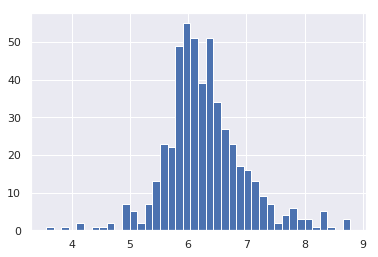


Distribution without outliers


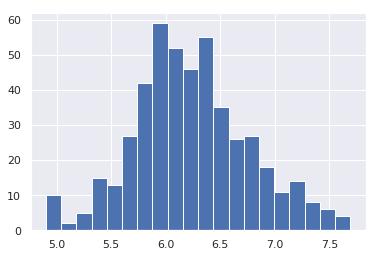

In [59]:

print("Distribution with all values")
plt.hist(data["rm"],bins=40)
plt.show()
print();
print("Distribution without outliers")
data_without_outliers=data[(data["rm"] < (6.3 + 2 * 0.7))&(data["rm"] > (6.3 - 2 * 0.7))]
plt.hist(data_without_outliers["rm"],bins=20)
plt.show()

#### Deal with missing data [DEMO - WALKTHRU]

Make an informed decision about which rows to eliminate based on which column or columns have missing data.

The decisions can be many:
- remove rows with one or more missing values
- remove rows with the number of missing values above a certain threshold (i.e. more than 75% of the columns with missing values)
- fill the missing values with computed values
    - mean
    - imputed
    - predicted
    - other transformations
    
These decisions and transformations are purely dependent on the goal and objective of behind the analysis.

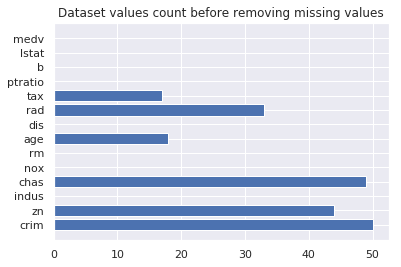

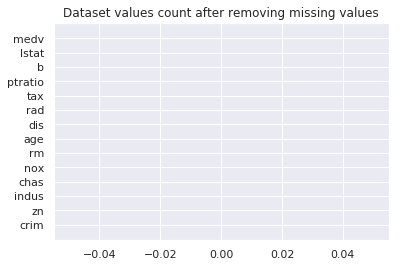

In [19]:
total_rows = data.shape[0]
total_rows_without_missing_values=data.count()
missing_values_count=(total_rows - total_rows_without_missing_values)
plt.barh(data.columns, missing_values_count)
plt.title("Dataset values count before removing missing values")
plt.show()

# Remove rows with columns missing data 
if sum(missing_values_count) > 0:
    data = data.dropna()

print("")

# Check the dataset after dropping rows
total_rows = data.shape[0]
total_rows_without_missing_values=data.count()
missing_values_count=(total_rows - total_rows_without_missing_values)
plt.barh(data.columns, missing_values_count)
plt.title("Dataset values count after removing missing values")
plt.show()

### Deal with too much data

|Type of problems |Technique to use|
|-----------------------------|---------------------------|
|needle in a haystack problems |Step1: group data + histogram - to identify the disproportion|
|(huge dataset with disproportionate|Step 2: Undersampling the classes to remove data|
|class distribution: e.g. we try to detect |Step 3: Oversampling by adding more data|
|data (horse rolling which is a rare | |
|event vs simply standing or lying) | |
|----------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
|.| Step 1: Manage at the training stage (adjust hyperparameter) |
|.| (check ML Mastery for more techniques in the google docs) |
|----------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| dataset with class overload problems | Group together sparse categories |
|(column with astronomical number      | Remove sparse categories |
|of categories. e.g. city in house prices)| Summarising categories into higher levels of abstractions |


### Preparatory questions to ask

Do we have those problems to fix ?

- outliers
- missing data
- class overload
- too many features
- unbalanced dataset
- have we removed or balanced any existing bias in the dataset?

### Please refer to the [Slides](http://bit.ly/do-you-know-your-data) for the step here after.